In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Import Data

Dataset : https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [2]:
df = pd.read_csv('Dataset/Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


# Preprocessing

In [3]:
#lihat ukuran data
df.shape

(310, 14)

In [4]:
# cek semua tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [5]:
#cek data yang kosong
df.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [6]:
# hapus kolom Unnamed: 13
df.drop("Unnamed: 13",axis=1,inplace=True)

In [7]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [8]:
# ubah categorical menjadi numerical di kolom class_att
df['Class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [9]:
le = LabelEncoder()
df['Class_att'] = le.fit_transform(df['Class_att'])
df['Class_att'].unique()

array([0, 1], dtype=int64)

In [10]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [11]:
df['Class_att'].unique()

array([0, 1], dtype=int64)

In [12]:
# cek lagi apakah ada yg kosong
df.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

In [13]:
# rename column agar sesuai dengan dataset
df.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [14]:
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [15]:
# Normalisasi Data pakai yang Min-Max
from sklearn import preprocessing

x = df.iloc[:,:-1].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

X = pd.DataFrame(x_scaled).values # ini variable independent
y = df.iloc[:,-1].values # ini variable dependent

# x = df.drop(["class"], axis = 1) #another way independent
# y = df['class' #another way dependent

# Klasifikasi

<b>Tips Sebelum melakukan klasifikasi (double tap here)</b>
<!-- jika menggunakan beberapa metode dalam 1 file python, usahakan semua varabiablenya berbeda dan juga yg paling penting setiap random state harus beda setiap classifikasi karena nantinya bisa menyebabkan hasilnya sama!
Source: https://stackoverflow.com/questions/42191717/python-random-state-in-splitting-dataset -->

## 1. SVM

### 1.1 Kernel Linear

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47)

In [18]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [19]:
linear_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = linear_svc.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]


In [21]:
#akurasi
akurasi_score = accuracy_score(y_test,y_pred)
print(akurasi_score)

0.7849462365591398


In [22]:
#f1 score
f1_score = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score)

0.7111801242236025


In [23]:
# Cross Validation
scores = cross_val_score(linear_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.48387097 0.75806452 0.82258065 0.80645161 0.79032258]
0.732258064516129


In [24]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[60  4]
 [16 13]]


In [25]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.79      0.94      0.86        64
          1       0.76      0.45      0.57        29

avg / total       0.78      0.78      0.77        93



### 1.2 Kernel Polynomial

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=48)

In [28]:
polynomial_svc = svm.SVC(kernel='poly', degree=8)
polynomial_svc.kernel

'poly'

In [29]:
polynomial_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred_poly = polynomial_svc.predict(X_test)
print(y_pred_poly)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#akurasi
akurasi_score_poly = accuracy_score(y_test,y_pred_poly)
print(akurasi_score_poly)

0.6989247311827957


In [32]:
#f1 score
f1_score_poly = f1_score(y_test, y_pred_poly, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_poly)

0.41139240506329117


C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# Cross Validation
scores = cross_val_score(polynomial_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.67741935 0.67741935 0.67741935 0.67741935 0.67741935]
0.6774193548387096


In [34]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_poly)

In [35]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred_poly)
print(report)

             precision    recall  f1-score   support

          0       0.70      1.00      0.82        65
          1       0.00      0.00      0.00        28

avg / total       0.49      0.70      0.58        93



C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 1.3 Kernel Radiant Basis Function(RBF)

In [36]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=49)

In [38]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [39]:
rbf_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_pred_rbf = rbf_svc.predict(X_test)
print(y_pred_rbf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
#akurasi
akurasi_score_rbf = accuracy_score(y_test,y_pred_rbf)
print(akurasi_score_rbf)

0.5698924731182796


In [42]:
#f1 score
f1_score_rbf = f1_score(y_test, y_pred_rbf, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_rbf)

0.36301369863013705


C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Cross Validation
scores = cross_val_score(rbf_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.66129032 0.67741935 0.67741935 0.67741935 0.67741935]
0.6741935483870967


In [44]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rbf)
print(confusion_matrix)

[[53  0]
 [40  0]]


In [45]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred_rbf)
print(report)

             precision    recall  f1-score   support

          0       0.57      1.00      0.73        53
          1       0.00      0.00      0.00        40

avg / total       0.32      0.57      0.41        93



C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 1.4 Kernel Sigmoid

In [46]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=50)

In [48]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.kernel

'sigmoid'

In [49]:
sigmoid_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred_sig = sigmoid_svc.predict(X_test)
print(y_pred_sig)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [51]:
#akurasi
akurasi_score_sig = accuracy_score(y_test,y_pred_sig)
print(akurasi_score_sig)

0.7311827956989247


In [52]:
#f1 score
f1_score_sig = f1_score(y_test, y_pred_sig, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_sig)

0.422360248447205


C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Cross Validation
scores = cross_val_score(sigmoid_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.67741935 0.67741935 0.67741935 0.67741935 0.67741935]
0.6774193548387096


In [54]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_sig)
print(confusion_matrix)

[[68  0]
 [25  0]]


In [55]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.78      0.87      0.82        68
          1       0.47      0.32      0.38        25

avg / total       0.69      0.72      0.70        93



## 2.  K-nearest Neighbors (KNN)

In [56]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47) #70 % data latih, 30 % data test

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [59]:
y_pred = neigh.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1]


In [60]:
#akurasi
akurasi_score = accuracy_score(y_test,y_pred)
print(akurasi_score)

0.7741935483870968


In [61]:
#f1 score
f1_score = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score)

0.7229394240317776


In [62]:
# Cross Validation
scores = cross_val_score(neigh, X, y, cv=5)
print(scores)
print(scores.mean())

[0.5        0.75806452 0.70967742 0.77419355 0.74193548]
0.6967741935483872


In [63]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[56  8]
 [13 16]]


In [64]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.88      0.84        64
          1       0.67      0.55      0.60        29

avg / total       0.77      0.77      0.77        93



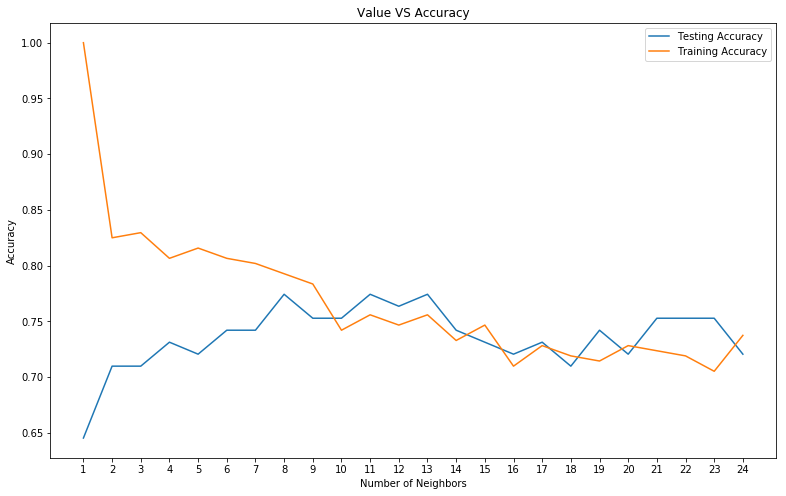

Best accuracy is 0.7741935483870968 with K = 8


In [65]:
#lihat nilai K yg lain
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot/Visualization
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
# plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
                           

## 3. Decision Tree Classification (DTC)

In [66]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47) #70 % data latih, 30 % data test

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [68]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [69]:
y_pred = dtc.predict(X_test)

In [70]:
#akurasi
akurasi_score_dtc = accuracy_score(y_test,y_pred)
print(akurasi_score_dtc)

0.7526881720430108


In [71]:
#f1 score
f1_score_dtc = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_dtc)

0.7380281690140845


In [72]:
# Cross Validation
scores_dtc = cross_val_score(dtc, X, y, cv=5)
print(scores_dtc)
print(scores_dtc.mean())

[0.41935484 0.72580645 0.80645161 0.96774194 0.80645161]
0.7451612903225806


In [73]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[46 18]
 [ 5 24]]


In [74]:
# report classification (precision, recall, f1-score, support) #ini antara weigthed atau macro
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.90      0.72      0.80        64
          1       0.57      0.83      0.68        29

avg / total       0.80      0.75      0.76        93

